<a href="https://colab.research.google.com/github/vivek201102/ML-Labs/blob/master/Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

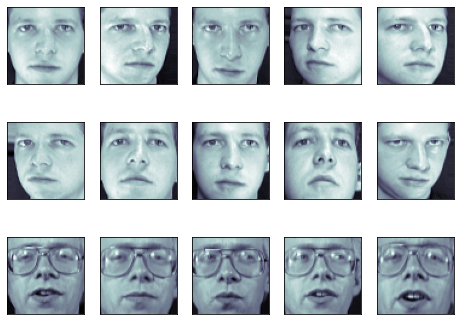

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

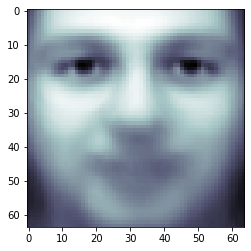

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
cmap=plt.cm.bone)

In [ ]:
print(pca.components_.shape)

(150, 4096)


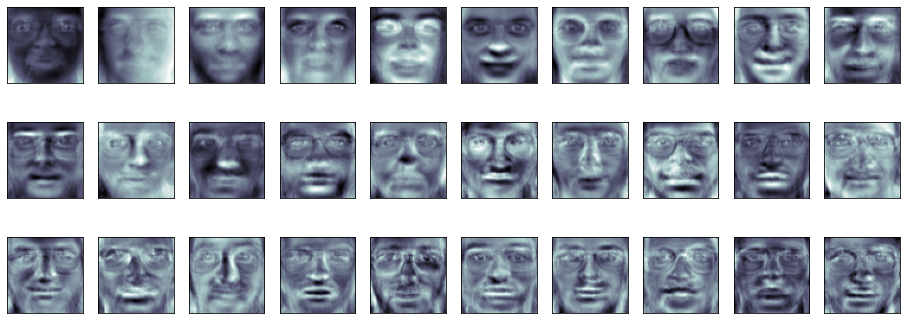

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

GaussianNB()

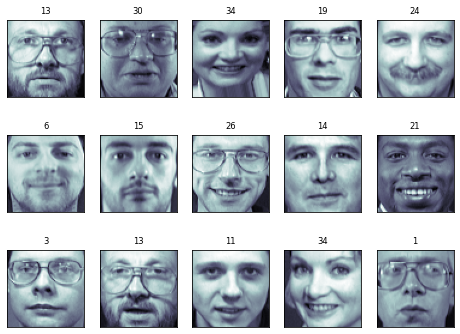

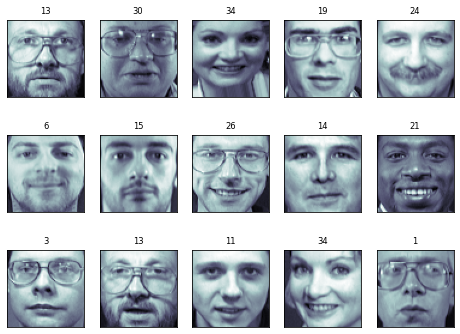

In [ ]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
#with PCA
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.12      1.00      0.22         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           9       0.20      1.00      0.33         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

faces = datasets.fetch_olivetti_faces()
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=90)
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)

print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      1.00      1.00         2
           2       0.33      1.00      0.50         1
           3       1.00      0.25      0.40         4
           4       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3
           8       1.00      1.00      1.00         3
           9       0.67      0.67      0.67         3
          10       1.00      0.50      0.67         4
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         1
          13       1.00      1.00      1.00         2
          14       1.00      0.80      0.89         5
          15       0.33      1.00      0.50         3
          16       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         2
          18       1.00    

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 1]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
#Load dataset
iris = datasets.load_iris()

In [ ]:
# print the names of the 13 features
print("Features: ", iris.feature_names)
# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [ ]:
print("\nData shape: ",iris.data.shape)
print("\nTraget shape: ",iris.target.shape)
print("\nData type: ",type(iris.data))
newdata = iris.data[50:,:]
newtarget = iris.target[50:]
print("\nNew Data shape: ",newdata.shape)
print("\nNew Traget shape: ",newtarget.shape)


Data shape:  (150, 4)

Traget shape:  (150,)

Data type:  <class 'numpy.ndarray'>

New Data shape:  (100, 4)

New Traget shape:  (100,)


In [ ]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(newdata,
newtarget, test_size = 0.30, random_state = 5)

In [ ]:
import numpy as np
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(data_train, target_train)
#Predict the response for test dataset
target_pred = gnb.predict(data_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
print(metrics.confusion_matrix(target_test, target_pred))

[[16  1]
 [ 2 11]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=2, whiten=True)),

('gnb', GaussianNB())])

clf.fit(data_train, target_train)
target_pred = clf.predict(data_test)
print(metrics.classification_report(target_test, target_pred))
print(metrics.confusion_matrix(target_test, target_pred))
plt.show()

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[16  1]
 [ 0 13]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
#Load dataset
iris = datasets.load_iris()
iris.data.shape

(150, 4)

In [ ]:
X, y = iris['data'], iris['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=90)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)
print(pca.components_)
print(pca.components_.shape)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
(2, 4)


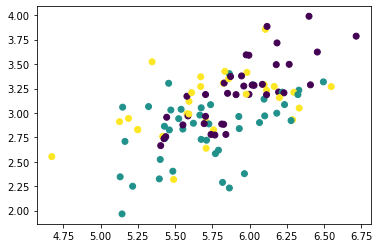

In [ ]:
Xmean = X_train - X_train.mean(axis=0)
value = Xmean @ pca.components_[0]
pc1 = value.reshape(-1,1) @ pca.components_[0].reshape(1,-1)
Xremove = X_train - pc1
plt.scatter(Xremove[:,0], Xremove[:,1], c=y_train)
plt.show()

In [ ]:
value = Xmean @ pca.components_[1]
pc2 = value.reshape(-1,1) @ pca.components_[1].reshape(1,-1)
Xremove = Xremove - pc2
# plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

In [ ]:
value = Xmean @ pca.components_[2]
pc3 = value.reshape(-1,1) @ pca.components_[2].reshape(1,-1)
Xremove = Xremove - pc3
plt.scatter(Xremove[:,0], Xremove[:,1], c=y)
plt.show()

IndexError: ignored

In [ ]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.svm import SVC
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = SVC(kernel="linear", gamma='auto').fit(X_train, y_train)
print("Using all features, accuracy: ", clf.score(X_test, y_test))
print("Using all features, F1: ", f1_score(y_test, clf.predict(X_test), average="macro"))
 
mean = X_train.mean(axis=0)
X_train2 = X_train - mean
X_train2 = (X_train2 @ pca.components_[0]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train2, y_train)
X_test2 = X_test - mean
X_test2 = (X_test2 @ pca.components_[0]).reshape(-1,1)
print("Using PC1, accuracy: ", clf.score(X_test2, y_test))
print("Using PC1, F1: ", f1_score(y_test, clf.predict(X_test2), average="macro"))

mean = X_train.mean(axis=0)
X_train3 = X_train - mean
X_train3 = (X_train3 @ pca.components_[1]).reshape(-1,1)
clf = SVC(kernel="linear", gamma='auto').fit(X_train3, y_train)
X_test3 = X_test - mean
X_test3 = (X_test3 @ pca.components_[1]).reshape(-1,1)
print("Using PC2, accuracy: ", clf.score(X_test3, y_test))
print("Using PC2, F1: ", f1_score(y_test, clf.predict(X_test3), average="macro"))

Using all features, accuracy:  0.96
Using all features, F1:  0.9629629629629629
Using PC1, accuracy:  0.92
Using PC1, F1:  0.9259259259259259
Using PC2, accuracy:  0.44
Using PC2, F1:  0.3572567783094099


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=2, whiten=True)),

('gnb', GaussianNB())])

clf.fit(data_train, target_train)
target_pred = clf.predict(data_test)
print(metrics.classification_report(target_test, target_pred))
print(metrics.confusion_matrix(target_test, target_pred))
plt.show()

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[16  1]
 [ 0 13]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import decomposition


data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('dt', tree.DecisionTreeClassifier(criterion='entropy',max_depth=5))])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=90)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()
print(metrics.classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        19

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('svc', SVC(kernel='linear', random_state=0))])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=90)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()
print(metrics.classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  7  1]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93         7
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import decomposition


data = datasets.load_iris()
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)),('gnb', GaussianNB())])
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state=90)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()
print(metrics.classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  7  2]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.78      1.00      0.88         7
           2       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38

